# Now it's your turn!

Use the following dataset of scraped "Data Scientist" and "Data Analyst" job listings to create your own Document Classification Models.

<https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-NLP/master/module3-Document-Classification/job_listings.csv>

Requirements:

- Apply both CountVectorizer and TfidfVectorizer methods to this data and compare results
- Use at least two different classification models to compare differences in model accuracy
- Try to "Hyperparameter Tune" your model by using different n_gram ranges, max_results, and data cleaning methods
- Try and get the highest accuracy possible!

In [105]:
import pandas as pd
import seaborn as sns

In [91]:
##### Your Code Here #####
df = pd.read_csv("job_listings.csv", )

In [92]:
df.head()

,description,title,job
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Data Scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,Data Scientist
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,Data Scientist
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Data Scientist


In [93]:
import re
import nltk
def clean_words(l):
    
    l2 = re.sub(r'<.*?>'," ", l)
    l2 = l2.lower()
    l2 = re.sub(r'\\xc2\\xa8',r'',l2)
    l2 = re.sub(r'\\n',r'',l2)
    l2 = re.sub(r'/',' ', l2)
    l2 = re.sub(r'^b\'','',l2)
    l2 = re.sub(r'^b\"','',l2)
    l2 = re.sub(r"\\'", ' ', l2)
    
    return l2
df["clean_words"] = df["description"].apply(lambda x: clean_words(str(x)))

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')

# df["nltk_token"] = df["clean_words"].apply(lambda x : word_tokenize(x))
# df["nltk_token"] = df["nltk_token"].apply(lambda x: [word for word in x if word.isalpha()])
# df["nltk_token"] = df["nltk_token"].apply(lambda x : [word for word in x if not word in stop_words])
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# def get_lemmas(word_list):
#     lemmas = [lemmatizer.lemmatize(word) for word in word_list]
    
#     return lemmas
# df["word_lemmas"] = df["nltk_token"].apply(lambda x : get_lemmas(x))

In [94]:
df.head()

,description,title,job,clean_words
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Data Scientist,job requirements: conceptual understandin...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,Data Scientist,"job description as a data scientist 1, you ..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,Data Scientist,as a data scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,Data Scientist,"$4,969 - $6,756 a month contract under ..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Data Scientist,location: usa \xe2\x80\x93 multiple location...


In [95]:
df["job"].value_counts()

Data Analyst      250
Data Scientist    250
Name: job, dtype: int64

In [96]:
df["job"]=df["job"].replace("Data Analyst", 0)
df["job"]=df["job"].replace("Data Scientist",1)

In [97]:
df["job"].value_counts()

1    250
0    250
Name: job, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

X = df["clean_words"]
y = df["job"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train[1]

' job description   as a data scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. you will do so by empowering and improving the next generation of accolade applications and user experiences.   a day in the life\\xe2\\x80\\xa6    work with a small agile team to design and develop mobile applications in an iterative fashion.  work with a tight-knit group of development team members in seattle.  contribute to best practices and help guide the future of our applications.  operates effectively as a collaborative member of the development team.  operates effectively as an individual for quick turnaround of enhancements and fixes.  responsible for meeting expectations and deliverables on time with high quality.  drive and implement new features within our mobile applications.  perform thorough manual testing and writing test cases that cover all areas.  identify new development tools approaches

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=None, ngram_range=(1,1), stop_words='english')

vectorizer.fit(X_train)

train_word_counts = vectorizer.transform(X_train)

X_train_vectorized = pd.DataFrame(train_word_counts.toarray(), columns=vectorizer.get_feature_names())


test_word_counts = vectorizer.transform(X_test)

X_test_vectorized = pd.DataFrame(test_word_counts.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
!pip install -i https://test.pypi.org/simple/lambdata-crawftv

Train Accuracy: 0.9925
Test Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.90      0.93      0.91        46

   micro avg       0.92      0.92      0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

AxesSubplot(0.241667,0.125;0.503333x0.755)


C:\Users\cwcol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


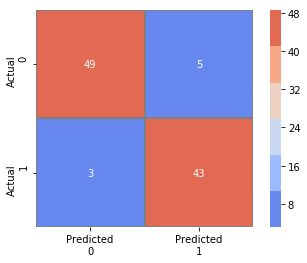

In [106]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42).fit(X_train_vectorized, y_train)

train_predictions = LR.predict(X_train_vectorized)
test_predictions = LR.predict(X_test_vectorized)

from sklearn.metrics import accuracy_score

print(f'Train Accuracy: {accuracy_score(y_train, train_predictions)}')
print(f'Test Accuracy: {accuracy_score(y_test, test_predictions)}')

from lambdata_crawftv.ClassificationVisualization import classification_visualization
classification_visualization(y_test,test_predictions)

# Stretch Goals

- Try some agglomerative clustering using cosine-similarity-distance! (works better with high dimensional spaces) robust clustering - Agglomerative clustering like Ward would be cool. Try and create an awesome Dendrogram of the most important terms from the dataset.

- Awesome resource for clustering stretch goals: 
 - Agglomerative Clustering with Scipy: <https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/>
 - Agglomerative Clustering for NLP: <http://brandonrose.org/clustering>
 
- Use Latent Dirichlet Allocation (LDA) to perform topic modeling on the dataset: 
 - Topic Modeling and LDA in Python: <https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24>
 - Topic Modeling and LDA using Gensim: <https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/>
